In [22]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
import matplotlib.pyplot as plt
import seaborn as sns
from configs.RecursiveVPSDE.Markovian_fBiPotDDims_NonSep.recursive_Markovian_PostMeanScore_fBiPot12DimsNS_T256_H05_tl_110data_StbleTgt import get_config


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
num_paths = 10240
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
config = get_config()

In [24]:
def get_drift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDimsNS/"
    true_files = []
    local_files = []
    global_files = []
    for file in os.listdir(root_nadaraya_dir):
        print(file)
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                global_files.append(root_nadaraya_dir+file)
            elif "local" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    global_files = sorted(global_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, global_files, bws

In [25]:
true_nadaraya_files, local_nadaraya_files, global_nadaraya_files, bws = get_drift_files(config=config, root_dir=root_dir)

IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0055348bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy
.DS_Store
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0041919bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_local_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0041919bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_true_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0073079bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0055348bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_true_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_009649bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_009649bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_true_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0073079bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_local_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0055348bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_local_states.npy
IIDNadaraya

In [26]:
def get_score_drift_files(root_dir, ts_type):
    root_score_dir = root_dir + f"ExperimentResults/TSPM_Markovian/12DDimsNS/"
    driftoostrack_true_files = []
    driftoostrack_local_files = []
    driftoostrack_global_files = []
    for file in os.listdir(root_score_dir):
        if "_MLP_" in file and ts_type in file:
            if "DriftTrack" in file and "true" in file:
                driftoostrack_true_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "global" in file:
                driftoostrack_global_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "local" in file:
                driftoostrack_local_files.append(root_score_dir+file)
    assert len(driftoostrack_true_files)>0, "No oos drift track files found"
    assert len(driftoostrack_local_files)>0, "No oos drift track files found"
    assert(len(driftoostrack_true_files) == len(driftoostrack_true_files))
    def extract_bw_drift_track_number(s):
        match = s.split("Nep_")[0].split("_")[-1]
        return int(match)
    driftoostrack_true_files = sorted(driftoostrack_true_files, key=extract_bw_drift_track_number)
    driftoostrack_local_files = sorted(driftoostrack_local_files, key=extract_bw_drift_track_number)
    driftoostrack_global_files = sorted(driftoostrack_global_files, key=extract_bw_drift_track_number)
    Nepochs_track = [extract_bw_drift_track_number(f) for f in driftoostrack_true_files]
    idx = np.argwhere(np.array(Nepochs_track)==18).flatten()[0]
    driftoostrack_true_files = driftoostrack_true_files[idx]
    driftoostrack_local_files = driftoostrack_local_files[idx]
    driftoostrack_global_files = driftoostrack_global_files[idx]
    return driftoostrack_true_files, driftoostrack_local_files,driftoostrack_global_files, Nepochs_track

In [27]:
from configs.RecursiveVPSDE.Markovian_fBiPotDDims_NonSep.recursive_Markovian_PostMeanScore_fBiPot12DimsNS_T256_H05_tl_110data_StbleTgt import get_config as get_score_config
score_config = get_score_config()
ts_type = f"ST_{config.feat_thresh:.3f}FTh_fBiPot_{config.ndims}DDimsNS".replace(".", "")
true_score_files, local_score_files, global_score_files, Nepochs_track = get_score_drift_files(ts_type=ts_type, root_dir=root_dir)

In [28]:
local_score_files

'/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/12DDimsNS/TSPM_MLP_ST_0010FTh_fBiPot_12DDimsNS_OOSDriftTrack_18Nep_00t0_3906e-03dT_025a_-20b_00c_10ResLay_2LFac_BetaMax20e+01_local_states.npy'

In [29]:
score_true = np.load(true_score_files)
score_global = np.load(global_score_files)
nad_true = np.load(true_nadaraya_files[0])
nad_global = np.load(global_nadaraya_files[0])
score_true=score_true.reshape(-1,score_true.shape[2], score_true.shape[-1])
score_global=score_global.reshape(-1,score_global.shape[2], score_global.shape[-1])
nad_true=nad_true.reshape(-1,nad_true.shape[2], nad_true.shape[-1])
nad_global=nad_global.reshape(-1,nad_global.shape[2], nad_global.shape[-1])
true_paths = np.load(score_config.data_path)

(51400,)


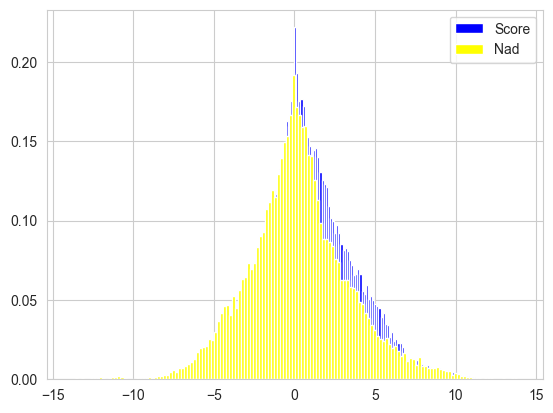

(51400,)


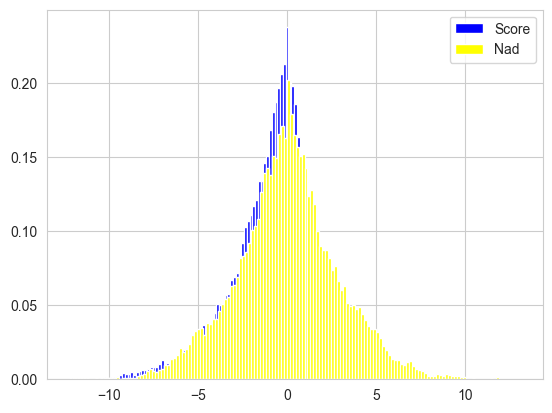

(51400,)


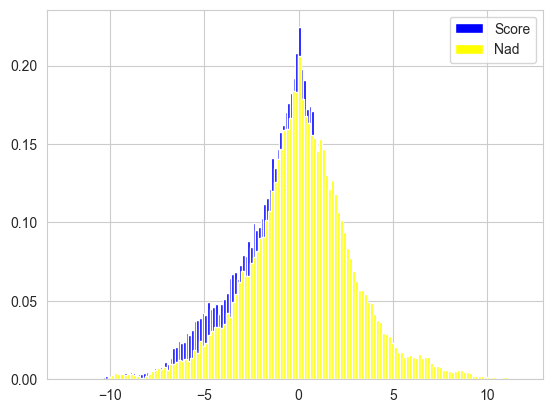

(51400,)


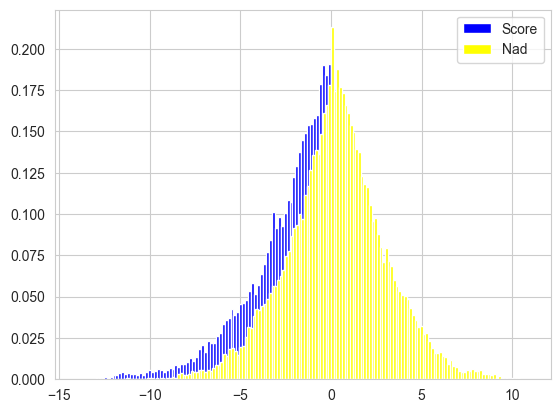

(51400,)


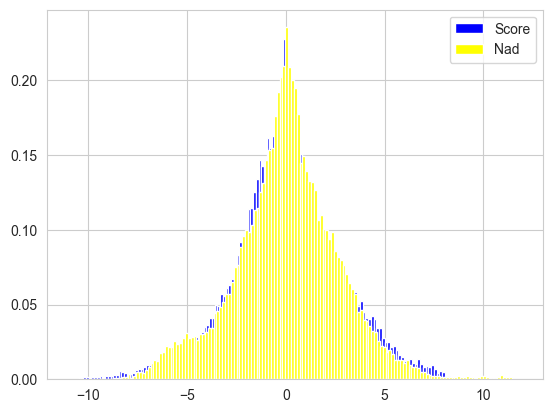

(51400,)


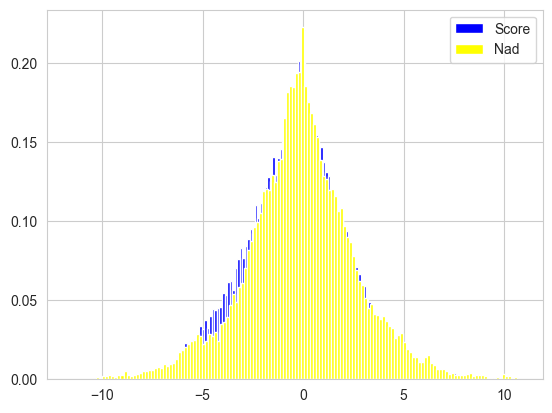

(51400,)


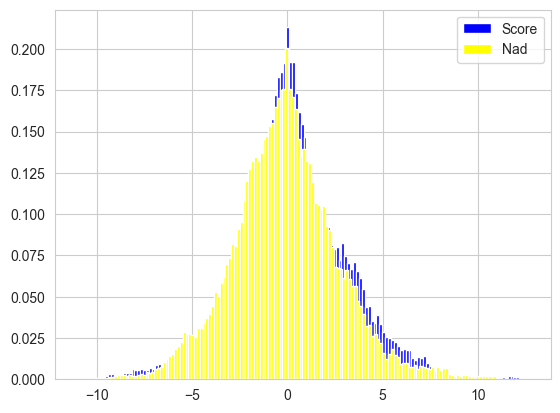

(51400,)


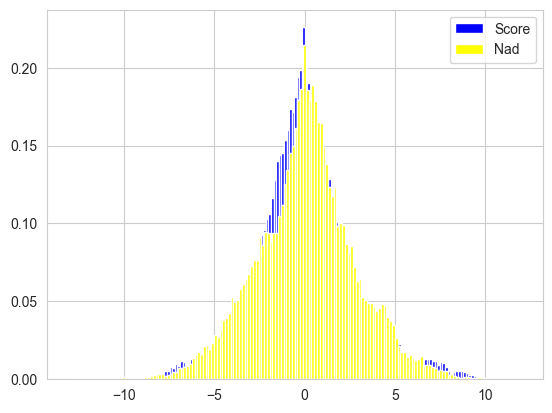

(51400,)


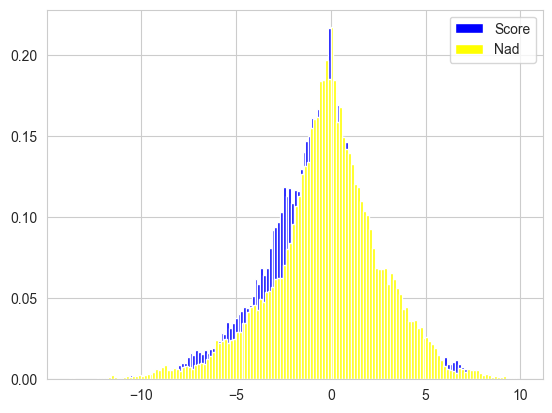

(51400,)


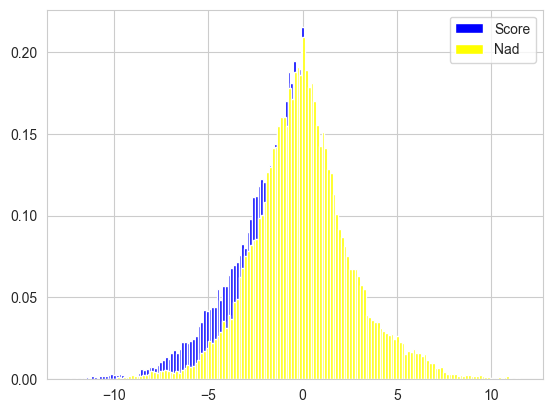

(51400,)


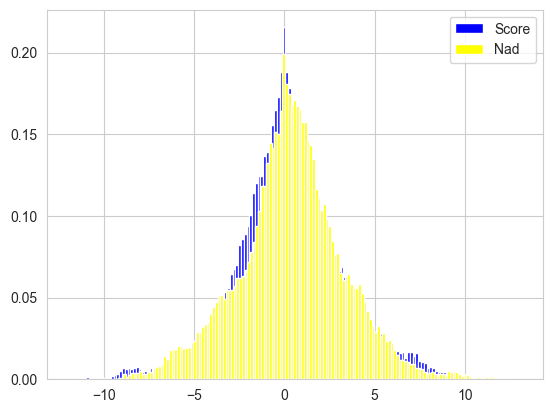

(51400,)


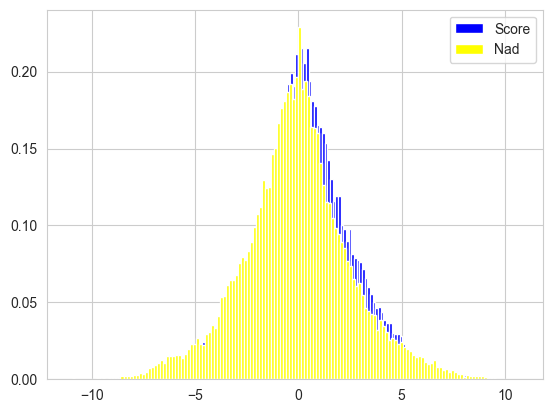

In [31]:
for d in range(score_global.shape[-1]):
    print(nad_true[:,:, d].flatten().shape)
    plt.hist(score_global[:,:, d].flatten(), bins=150, color="blue",density=True,label="Score")
    plt.hist(nad_global[:,:, d].flatten(), bins=150, color="yellow",density=True,label="Nad")
    #plt.hist(true_paths[:,:, d].flatten(), bins=150, color="red",density=True,label="True")
    plt.legend()
    plt.show()
    plt.close()